# Refined Stratified Sampling Example 4
Author: Mohit S. Chauhan Date: Jan 25, 2019

In this example, Stratified sampling is used to generate samples from Uniform distribution and sample expnsion is done adaptively using Refined Stratified Sampling.

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the STS, RSS and Krig class from UQpy.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.SampleMethods import RSS
from UQpy.Surrogates import Krig
from UQpy.RunModel import RunModel
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.patches as patches
import numpy as np
from scipy.spatial import Delaunay

Using UQpy STS class to generate samples for two random variables, which are uniformly distributed between 0 and 1.

In [2]:
x = STS(dist_name=['Uniform', 'Uniform'], dist_params=[[0, 1], [0, 1]], sts_design=[4, 4])

UQpy: Successful execution of STS design..


This plot shows the samples and stratas generated by the STS class.

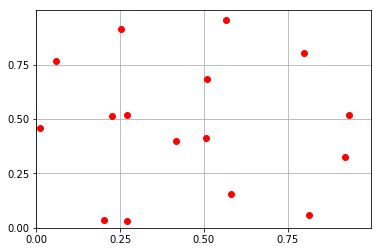

In [3]:
fig2 = plt.figure()
plt.plot(x.samples[:, 0], x.samples[:, 1], 'ro')
ax = fig2.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.show()

RunModel class is used to estimate the function value at sample points generated using STS class.

In [4]:
y_val = RunModel(x.samples, model_script='python_model_function.py')

This figure shows the actual function defined in python model script.

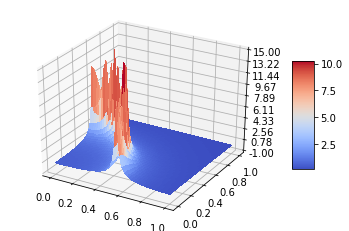

In [5]:
num = 50
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y_act = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y_act[i, j] = RunModel(np.array([[x1v[i, j], x2v[i, j]]]), model_script='python_model_function.py').qoi_list[0]
fig1 = plt.figure()
ax = fig1.gca(projection='3d')
# Plot for estimated values
surf = ax.plot_surface(x1v, x2v, y_act, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-1, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Krig class generated a surrogate model using STS samples and function value at those points.

In [6]:
K = Krig(samples=x.samples, values=np.array(y_val.qoi_list), reg_model='Linear', corr_model='Gaussian')

UQpy: Performing Krig...
Done!


This figure shows the surrogate model generated using Krig class from initial samples.

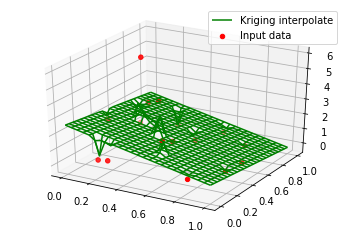

In [7]:
num = 25
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y[i, j] = K.interpolate(np.array([x1v[i, j], x2v[i, j]]))

fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot for estimated values
kr = ax.plot_wireframe(x1v, x2v, y, color='Green', label='Kriging interpolate')

# Plot for scattered data
ID = ax.scatter3D(x.samples[:, 0], x.samples[:, 1], np.array(y_val.qoi_list), color='Red', label='Input data')
plt.legend(handles=[kr, ID])
plt.show()

Using UQpy RSS class to expand samples generated by STS class. In this example, meta specifies the method used to estimate the gradient and Voronoi cells are used for stratification. Krig class is used with 'Gaussian' correlation model.

In [8]:
z = RSS(x=x, model='python_model_function.py', meta='Kriging', nsamples=200, reg_model='Linear', cell='Voronoi',
        corr_model='Gaussian', n_opt=10)

UQpy: Performing RSS design...
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
UQpy: Successful execution of STS design..
Done!


This figure shows the final samples generated using RSS class, where red dots shows the initial samples.

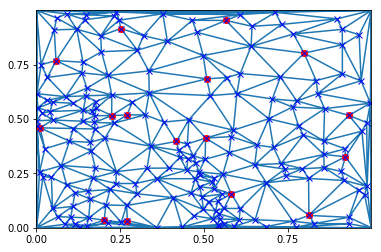

In [9]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(x.samples[:, 0], x.samples[:, 1], 'ro')
plt.plot(z.samplesU01[:, 0], z.samplesU01[:, 1], 'bx')
tri = Delaunay(z.points)
plt.triplot(z.points[:, 0], z.points[:, 1], tri.simplices)
plt.show()

Krig class is used to generate a surrogate model using final samples from RSS class.

In [10]:
K2 = Krig(samples=z.samples, values=z.values, reg_model='Linear', corr_model='Gaussian',
          corr_model_params=z.corr_model_params)

UQpy: Performing Krig...
Done!


This figure shows the final surrogate model, generated using 200 samples.

<Figure size 432x288 with 0 Axes>

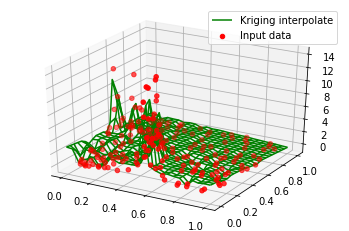

In [12]:
y = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y[i, j] = K2.interpolate(np.array([x1v[i, j], x2v[i, j]]))

plt.clf()
fig4 = plt.figure()
a2 = plt.axes(projection='3d')
# Plot for estimated values
kr = a2.plot_wireframe(x1v, x2v, y, color='Green', label='Kriging interpolate')

# Plot for scattered data
ID = a2.scatter3D(z.samples[:, 0], z.samples[:, 1], z.values, color='Red', label='Input data')
plt.legend(handles=[kr, ID])
plt.show()